 ### I) Preparing to train a predictive model

In [ ]:
import pandas as pd
import numpy as np
import datetime
import time
import os





In [3]:
# Build a simple set of tables

df1 = pd.DataFrame({'product': ['red shirt', 'red shirt', 'red shirt', 'white dress'],
                     'price': [49.33, 49.33, 32.49, 199.99]})
df2 = pd.DataFrame({'product': ['red shirt', 'blue pants', 'white tuxedo', 'white dress'],
                     'in_stock': [True, True, False, False]})

In [4]:
df1

,product,price
0,red shirt,49.33
1,red shirt,49.33
2,red shirt,32.49
3,white dress,199.99


In [6]:
#  Iner Merge


df = pd.merge(left=df1, right=df2, on='product', how='inner')

In [7]:
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [9]:
# Outer merge

df = pd.merge(left=df1, right=df2, on='product', how='outer')
df

,product,price,in_stock
0,blue pants,NaN,True
1,red shirt,49.33,True
2,red shirt,49.33,True
3,red shirt,32.49,True
4,white dress,199.99,False
5,white tuxedo,NaN,False


In [10]:
# Standard method

df.drop_duplicates()

,product,price,in_stock
0,blue pants,NaN,True
1,red shirt,49.33,True
3,red shirt,32.49,True
4,white dress,199.99,False
5,white tuxedo,NaN,False


In [11]:
# Using masks for more fine tuned control

df.duplicated()

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated()]

,product,price,in_stock
2,red shirt,49.33,True


In [14]:
df[~df.duplicated()]

,product,price,in_stock
0,blue pants,NaN,True
1,red shirt,49.33,True
3,red shirt,32.49,True
4,white dress,199.99,False
5,white tuxedo,NaN,False


In [15]:
df[~df['product'].duplicated()]

,product,price,in_stock
0,blue pants,NaN,True
1,red shirt,49.33,True
4,white dress,199.99,False
5,white tuxedo,NaN,False


In [16]:
# Let's overwrite the DataFrame using drop_duplicates

df.drop_duplicates(inplace=True)
df

,product,price,in_stock
0,blue pants,NaN,True
1,red shirt,49.33,True
3,red shirt,32.49,True
4,white dress,199.99,False
5,white tuxedo,NaN,False


In [17]:
# Drop the incomplete rows

df.dropna()

,product,price,in_stock
1,red shirt,49.33,True
3,red shirt,32.49,True
4,white dress,199.99,False


In [18]:
# Drop the incomplete columns

df.dropna(axis=1)

,product,in_stock
0,blue pants,True
1,red shirt,True
3,red shirt,True
4,white dress,False
5,white tuxedo,False


In [19]:
# DataFrame method for filling missing values

df.fillna?

Signature:
df.fillna(
    value: 'Hashable | Mapping | Series | DataFrame | None' = None,
    *,
    method: 'FillnaOptions | None' = None,
    axis: 'Axis | None' = None,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    downcast: 'dict | None | lib.NoDefault' = <no_default>,
) -> 'Self | None'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series:

    * ffill: propagate last valid observation forward to next valid.
    * backfill / bfill: use next valid observation to fill gap.

    .. deprecated:: 2.1.0
  

In [20]:
# Fill with the average

df.fillna(value=df.price.mean())

,product,price,in_stock
0,blue pants,93.936667,True
1,red shirt,49.330000,True
3,red shirt,32.490000,True
4,white dress,199.990000,False
5,white tuxedo,93.936667,False


In [21]:
# Fill with the previous value in that column

df.fillna(method='pad')

/tmp/ipykernel_4171/3056351359.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad')


,product,price,in_stock
0,blue pants,NaN,True
1,red shirt,49.33,True
3,red shirt,32.49,True
4,white dress,199.99,False
5,white tuxedo,199.99,False


In [23]:
# fill the data using the average

df = df.fillna(value=df.price.mean())

In [24]:
#create a new   "rating" column


ratings = ['low', 'medium', 'high']
np.random.seed(2)
df['rating'] = np.random.choice(ratings, len(df))
df

,product,price,in_stock,rating
0,blue pants,93.936667,True,low
1,red shirt,49.330000,True,medium
3,red shirt,32.490000,True,low
4,white dress,199.990000,False,high
5,white tuxedo,93.936667,False,high


In [25]:
# Convert in_stock to binary

df.in_stock = df.in_stock.map({False: 0, True: 1})
df

,product,price,in_stock,rating
0,blue pants,93.936667,1,low
1,red shirt,49.330000,1,medium
3,red shirt,32.490000,1,low
4,white dress,199.990000,0,high
5,white tuxedo,93.936667,0,high


In [26]:
# Encode ordinal labels

from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()
df.rating = rating_encoder.fit_transform(df.rating)
df

,product,price,in_stock,rating
0,blue pants,93.936667,1,1
1,red shirt,49.330000,1,2
3,red shirt,32.490000,1,1
4,white dress,199.990000,0,0
5,white tuxedo,93.936667,0,0


In [27]:
# Convert back

rating_encoder.inverse_transform(df.rating)

array(['low', 'medium', 'low', 'high', 'high'], dtype=object)

In [28]:

df.rating = rating_encoder.inverse_transform(df.rating)
df

,product,price,in_stock,rating
0,blue pants,93.936667,1,low
1,red shirt,49.330000,1,medium
3,red shirt,32.490000,1,low
4,white dress,199.990000,0,high
5,white tuxedo,93.936667,0,high


In [29]:
# Encode the odrinal labels properly using a custom mapping

ordinal_map = {rating: index for index, rating in enumerate(['low', 'medium', 'high'])}
print(ordinal_map)
df.rating = df.rating.map(ordinal_map)
df

{'low': 0, 'medium': 1, 'high': 2}


,product,price,in_stock,rating
0,blue pants,93.936667,1,0
1,red shirt,49.330000,1,1
3,red shirt,32.490000,1,0
4,white dress,199.990000,0,2
5,white tuxedo,93.936667,0,2


In [30]:
# One-hot-encode the product feature

df = pd.get_dummies(df)
df

,price,in_stock,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,93.936667,1,0,True,False,False,False
1,49.330000,1,1,False,True,False,False
3,32.490000,1,0,False,True,False,False
4,199.990000,0,2,False,False,True,False
5,93.936667,0,2,False,False,False,True


In [35]:
df.drop("in_stock", axis =1)

,price,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,93.936667,0,True,False,False,False
1,49.330000,1,False,True,False,False
3,32.490000,0,False,True,False,False
4,199.990000,2,False,False,True,False
5,93.936667,2,False,False,False,True


In [51]:
df.iloc[:, 2:]

,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,0,True,False,False,False
1,1,False,True,False,False
3,0,False,True,False,False
4,2,False,False,True,False
5,2,False,False,False,True


In [52]:
from sklearn.model_selection import train_test_split

X= df.drop("in_stock", axis=1)
y=df["in_stock"]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

In [53]:
X_train.shape, X_test.shape

((3, 6), (2, 6))

In [55]:
df.to_csv("../data/product.csv")

In [58]:
! tail "../data/product.csv"

,price,in_stock,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,93.93666666666667,1,0,True,False,False,False
1,49.33,1,1,False,True,False,False
3,32.49,1,0,False,True,False,False
4,199.99,0,2,False,False,True,False
5,93.93666666666667,0,2,False,False,False,True


In [59]:
# Read the data

df = pd.read_csv('../data/hr_data.csv')

In [60]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [61]:
df.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
13143,0.13,0.61,5,198.0,5.0,0,no,0,NaN,sales,medium
10302,0.69,0.66,4,178.0,3.0,0,no,0,NaN,RandD,low
616,0.39,0.49,2,144.0,3.0,0,yes,0,NaN,marketing,medium


In [62]:
df.left.value_counts()

left
no     11428
yes     3571
Name: count, dtype: int64

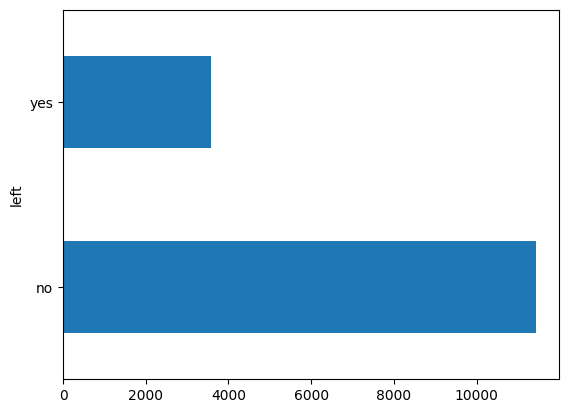

In [67]:
# graph distributed?
import matplotlib.pyplot as plt
%matplotlib inline
# fig, ax = plt.subplots(figsize=(5, 3))
df.left.value_counts().plot(kind= 'barh');

In [68]:
# Data missing 

df.left.isnull().sum()

np.int64(0)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14631 non-null  float64
 4   time_spend_company     14848 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   is_smoker              235 non-null    object 
 9   department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


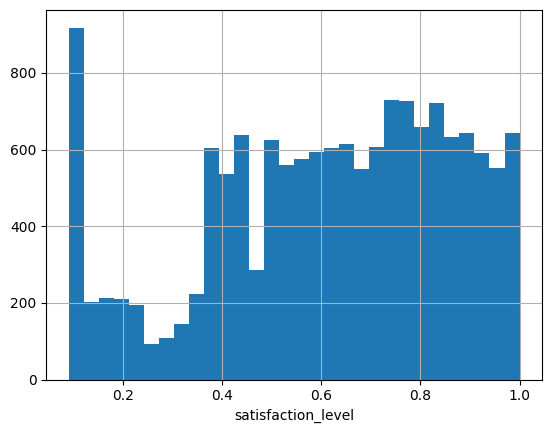

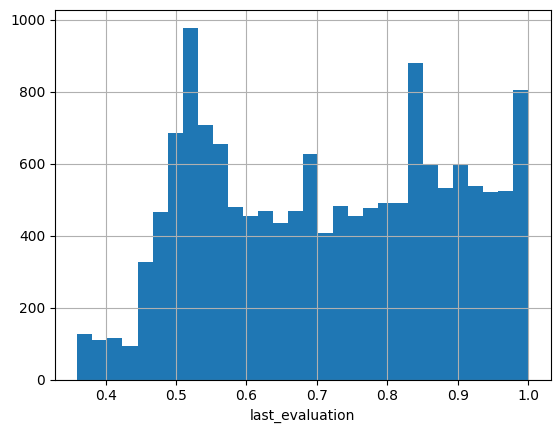

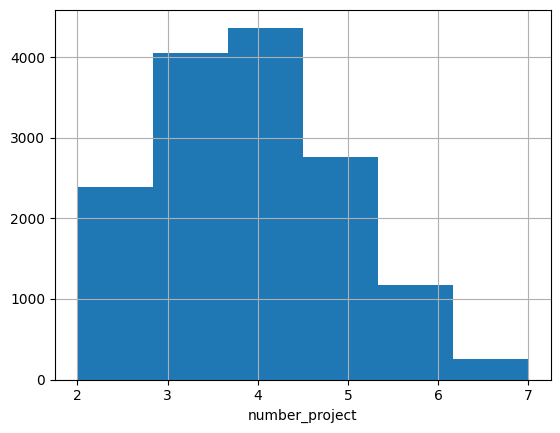

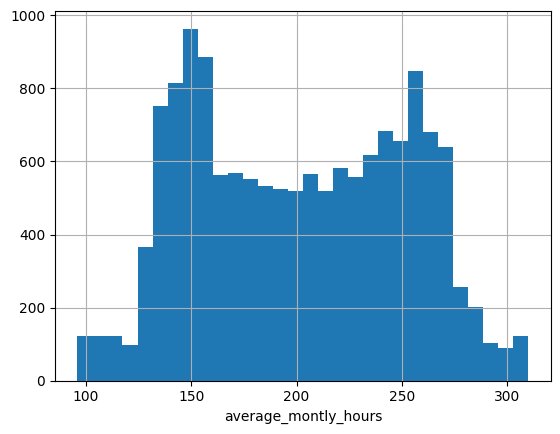

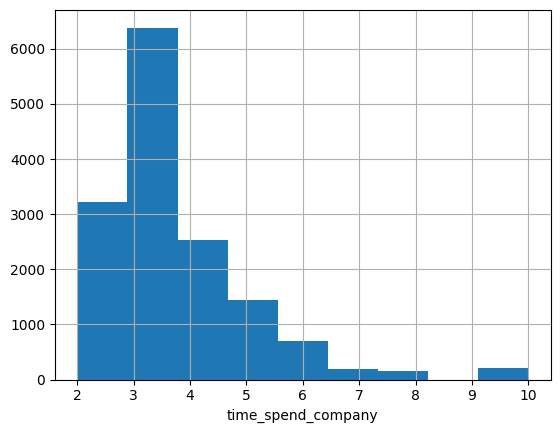

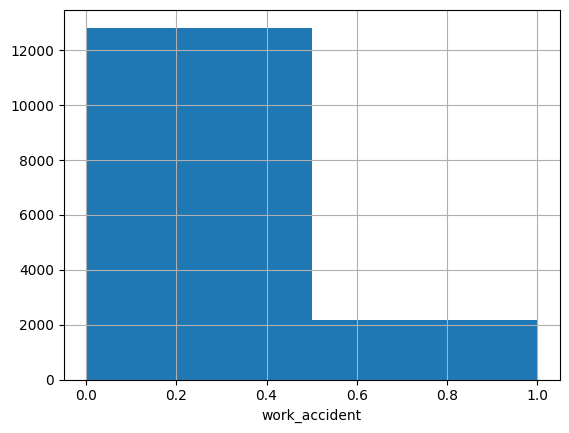

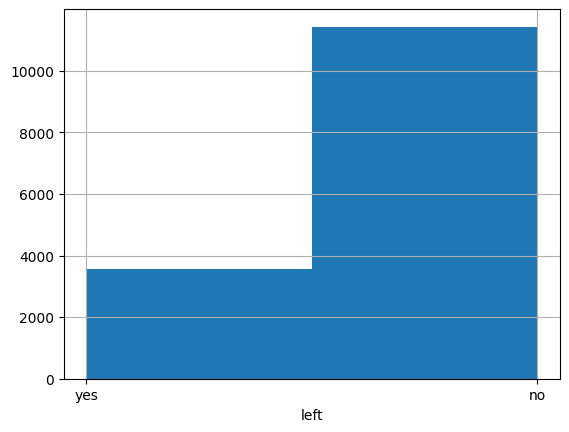

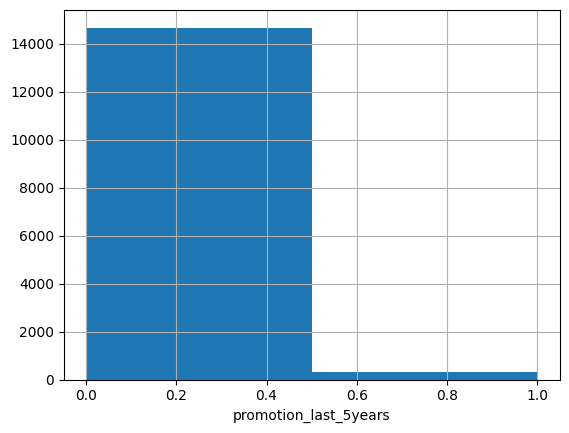

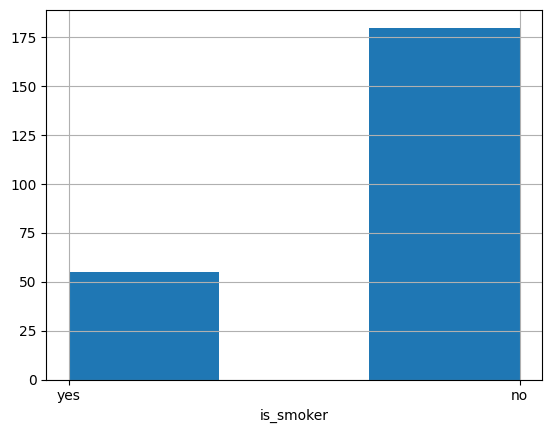

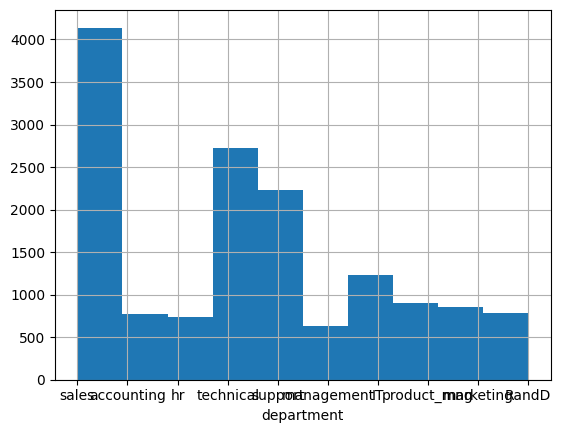

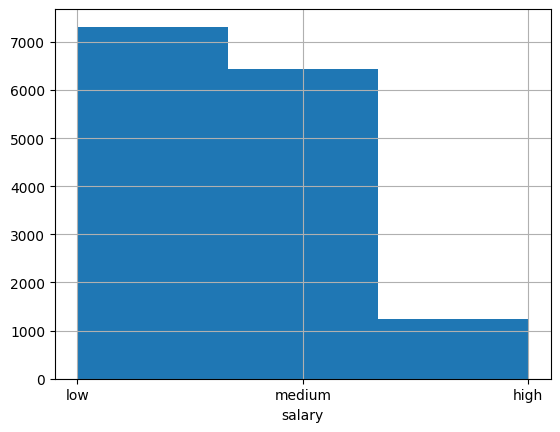

In [70]:
# Print the distibutions

for col  in df.columns:
    fig = plt.figure()
    num_bins = min((30, len(df[col].unique())))
    df[col].hist(bins=num_bins)
    plt.xlabel(col)

In [72]:
# pc Missing values?

df.isnull().sum() / df.shape[0] * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [73]:
# Remove is_smoker

del df['is_smoker']

In [74]:
# Fill time_spend_company
fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

In [75]:
# pc Missing values?

df.isnull().sum() / df.shape[0] * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

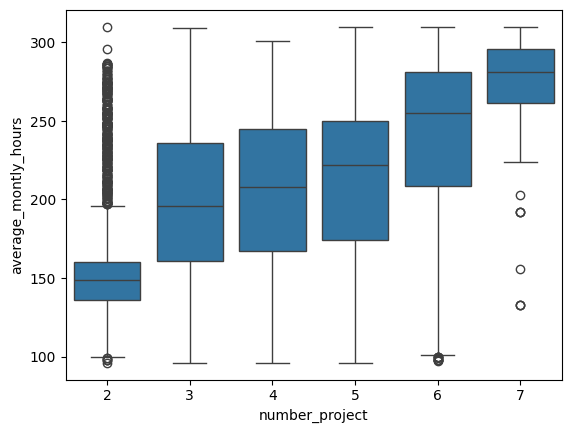

In [78]:
# How does average_montly_hours depend on number_project
import seaborn as sns
_=sns.boxplot(x='number_project', y='average_montly_hours', data=df)


In [79]:
plt.savefig('../graphs/graph_BxPlt.png',
            bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

In [80]:
# Calculate fill values for average_montly_hours

mean_per_project = df.groupby('number_project')\
                    .average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
mean_per_project

{2: np.float64(160.16353543979506),
 3: np.float64(197.47882323104236),
 4: np.float64(205.07858315740089),
 5: np.float64(211.99962839093274),
 6: np.float64(238.73947368421054),
 7: np.float64(276.015873015873)}

In [82]:
# Fill average_monthly_hours with the appropriate values

fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours = df.average_montly_hours.fillna(fill_values)

In [83]:
# Convert categorical features to binary integer representation

df.left = ((df.left=="yes")+0)
df = pd.get_dummies(df)

In [85]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
4658,0.68,0.67,4,135.0,2.0,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
438,0.77,0.90,4,237.0,5.0,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14414,0.10,0.93,6,256.0,4.0,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
7171,0.76,0.60,3,140.0,2.0,0,0,0,False,True,...,False,False,False,False,False,False,False,False,True,False
8905,0.91,0.79,4,254.0,2.0,0,0,0,False,False,...,False,False,False,False,False,True,False,True,False,False


In [86]:
df.to_csv('../data/hr_data_processed.csv', index=False)